<a href="https://colab.research.google.com/github/mojo-jojo-iot/ml/blob/main/iris_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
print(iris.data[:5])
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X, y = iris.data, iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

Confusion Matrix: [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


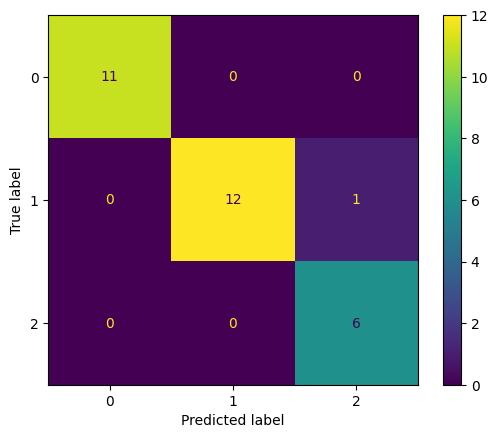

In [ ]:
print("Confusion Matrix:", conf_matrix)
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1, 2])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


In [ ]:
first_row = X[0].reshape(1, -1)

In [ ]:
predicted_class = clf.predict(first_row)
actual_class = y[0]

In [ ]:
print(f"Predicted class: {predicted_class[0]}")
print(f"Actual class: {actual_class}")

Predicted class: 0
Actual class: 0


In [ ]:
import joblib

In [ ]:
joblib.dump(clf,'dt_model.joblib')

['dt_model.joblib']

In [ ]:
clf_new = joblib.load('dt_model.joblib')

In [ ]:
second_row = X[100].reshape(1, -1)
predicted_class_new = clf_new.predict(second_row)
actual_class_new = y[100]

In [ ]:
print(f"Predicted class: {predicted_class_new[0]}")
print(f"Actual class: {actual_class_new}");

Predicted class: 2
Actual class: 2


In [ ]:
import numpy as np

In [ ]:
correct = y_test == y_pred
incorrect = ~correct

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

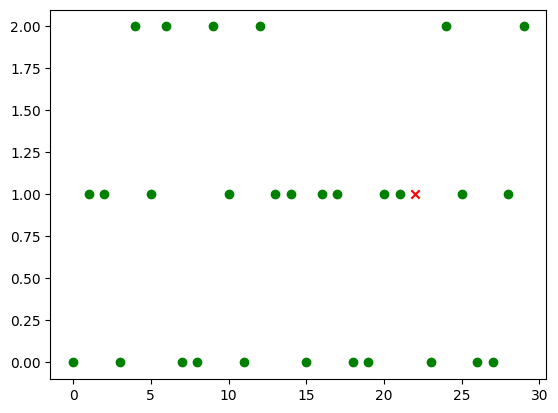

In [ ]:
plt.scatter(np.arange(len(y_test))[correct], y_test[correct], color = 'g', label = 'Correct Predictions', marker='o')
plt.scatter(np.arange(len(y_test))[incorrect], y_test[incorrect], color = 'r', label = 'Incorrect Predictions', marker='x')